In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset for Customer Churn & Behaviour Analysis

In [2]:
# Load and preview dataset
data = pd.read_excel("churn.xlsx")
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


We selected the columns we believe would offer the most valuable insights into customer behavior, with information like Tenure, Satisfication Score and Coupon Used being some of the columns kept.

In [3]:
# Select columns
cols = ['CustomerID','Churn', 'Tenure', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore','OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'CashbackAmount']
df = data[cols]

df.drop_duplicates(inplace=True)

df.head()

C:\Users\CelesteN\AppData\Local\Temp\ipykernel_28232\3674403243.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


,CustomerID,Churn,Tenure,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,CashbackAmount
0,50001,1,4.0,3.0,3,2,11.0,1.0,1.0,159.93
1,50002,1,NaN,3.0,4,3,15.0,0.0,1.0,120.90
2,50003,1,NaN,2.0,4,3,14.0,0.0,1.0,120.28
3,50004,1,0.0,2.0,4,5,23.0,0.0,1.0,134.07
4,50005,1,0.0,NaN,3,5,11.0,1.0,1.0,129.60


## Summary Statistics

In [4]:
df.describe()

,CustomerID,Churn,Tenure,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5375.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5630.000000
mean,52815.500000,0.168384,10.189899,2.931535,3.688988,3.066785,15.707922,1.751023,3.008004,177.223030
std,1625.385339,0.374240,8.557241,0.721926,1.023999,1.380194,3.675485,1.894621,2.939680,49.207036
min,50001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,11.000000,0.000000,1.000000,0.000000
25%,51408.250000,0.000000,2.000000,2.000000,3.000000,2.000000,13.000000,1.000000,1.000000,145.770000
50%,52815.500000,0.000000,9.000000,3.000000,4.000000,3.000000,15.000000,1.000000,2.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,4.000000,4.000000,18.000000,2.000000,3.000000,196.392500
max,55630.000000,1.000000,61.000000,5.000000,6.000000,5.000000,26.000000,16.000000,16.000000,324.990000


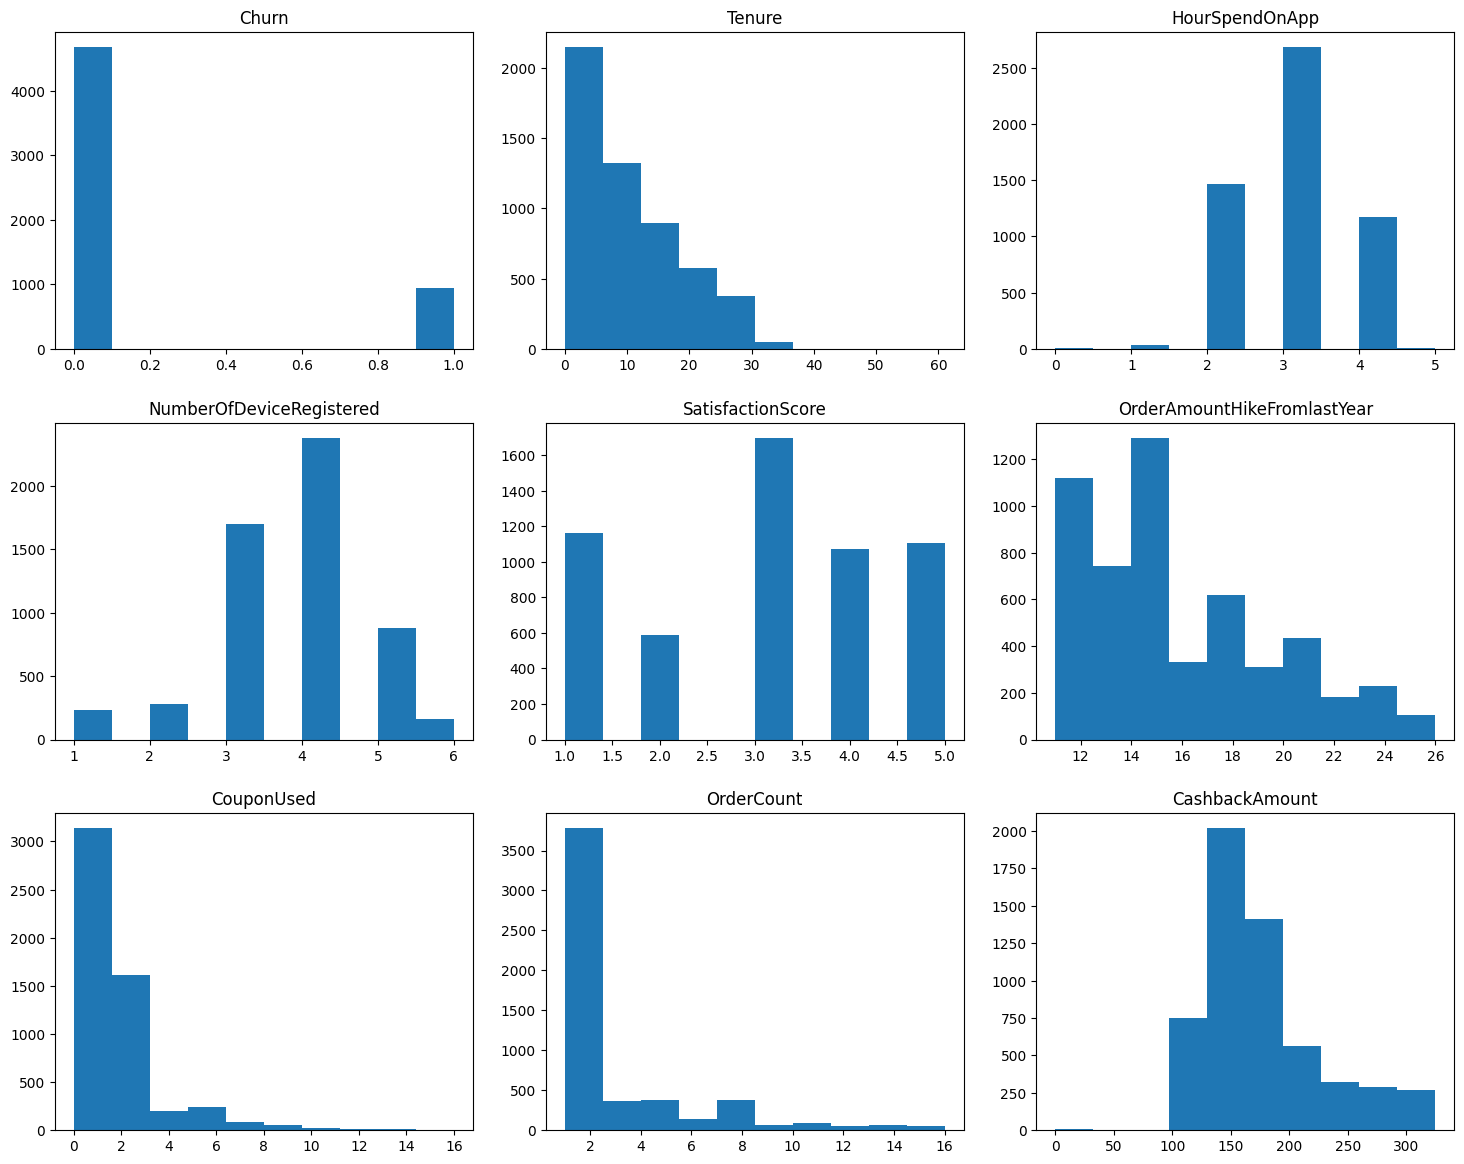

In [5]:
# Plot the distribution of columns

plt.figure(figsize=(15,12))

i = 1
for col in df.drop(['CustomerID'], axis = 1).columns:
    plt.subplot(3,3, i)
    plt.hist(df[col])
    plt.title(col)
    i += 1

plt.tight_layout(pad=2.0)
plt.show()

## Dealing with missing values

In [6]:
# Check for columns with missing values
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
SatisfactionScore                0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
CashbackAmount                   0
dtype: int64

Based on the distribution of these columns with missing values (mainly being skewed) and considering that the missing values are most likely due to information not being collected (e.g., new customers/ no such statistics), we decided to replace these missing values with 0 to maintain data consistency and ensure meaningful analysis.

In [7]:
df.fillna(0, inplace=True)

C:\Users\CelesteN\AppData\Local\Temp\ipykernel_28232\4231983114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)


We also decided to change the dtype of certain columns ('OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount') to ensure that values from these columns can strictly only be integers

In [8]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
SatisfactionScore                int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
CashbackAmount                 float64
dtype: object

In [9]:
changeCols = ['OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount']

for col in changeCols:
    df.loc[:,col] = df[col].astype(np.int64)

In [10]:
df.head()

,CustomerID,Churn,Tenure,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,CashbackAmount
0,50001,1,4.0,3.0,3,2,11.0,1.0,1.0,159.93
1,50002,1,0.0,3.0,4,3,15.0,0.0,1.0,120.90
2,50003,1,0.0,2.0,4,3,14.0,0.0,1.0,120.28
3,50004,1,0.0,2.0,4,5,23.0,0.0,1.0,134.07
4,50005,1,0.0,0.0,3,5,11.0,1.0,1.0,129.60


## Synthetic Data Generation

We believe that the relationships in this Customer dataset might be complex, and might be of various distributions. Hence, CTGAN from SDV package was chosen as the technique for generating synthetic data.

In [11]:
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

# Drop CustomerID since new customers data will be generated
df.drop(['CustomerID'], axis = 1, inplace=True)

metadata = SingleTableMetadata()

metadata.detect_from_dataframe(df)

synthesizer = CTGANSynthesizer(metadata, verbose=True)
synthesizer.fit(df)

synthetic_data = synthesizer.sample(num_rows=100000)

synthetic_data['CustomerID'] = synthetic_data.index

synthetic_data.head()

c:\Python312\Lib\site-packages\sdv\single_table\base.py:97: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
  File "c:\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
Gen. (-0.73) | Discrim. (0.13): 100%|██████████| 300/300 [06:26<00:00,  1.29s/it] 


,Churn,Tenure,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,CashbackAmount,CustomerID
0,0,7.0,2.0,1,5,24.0,0.0,1.0,125.166046,0
1,0,27.0,2.0,5,2,15.0,2.0,5.0,181.510331,1
2,0,3.0,2.0,3,1,14.0,1.0,4.0,142.745182,2
3,1,0.0,3.0,4,3,16.0,1.0,1.0,127.247562,3
4,0,1.0,3.0,6,5,22.0,2.0,2.0,206.091828,4


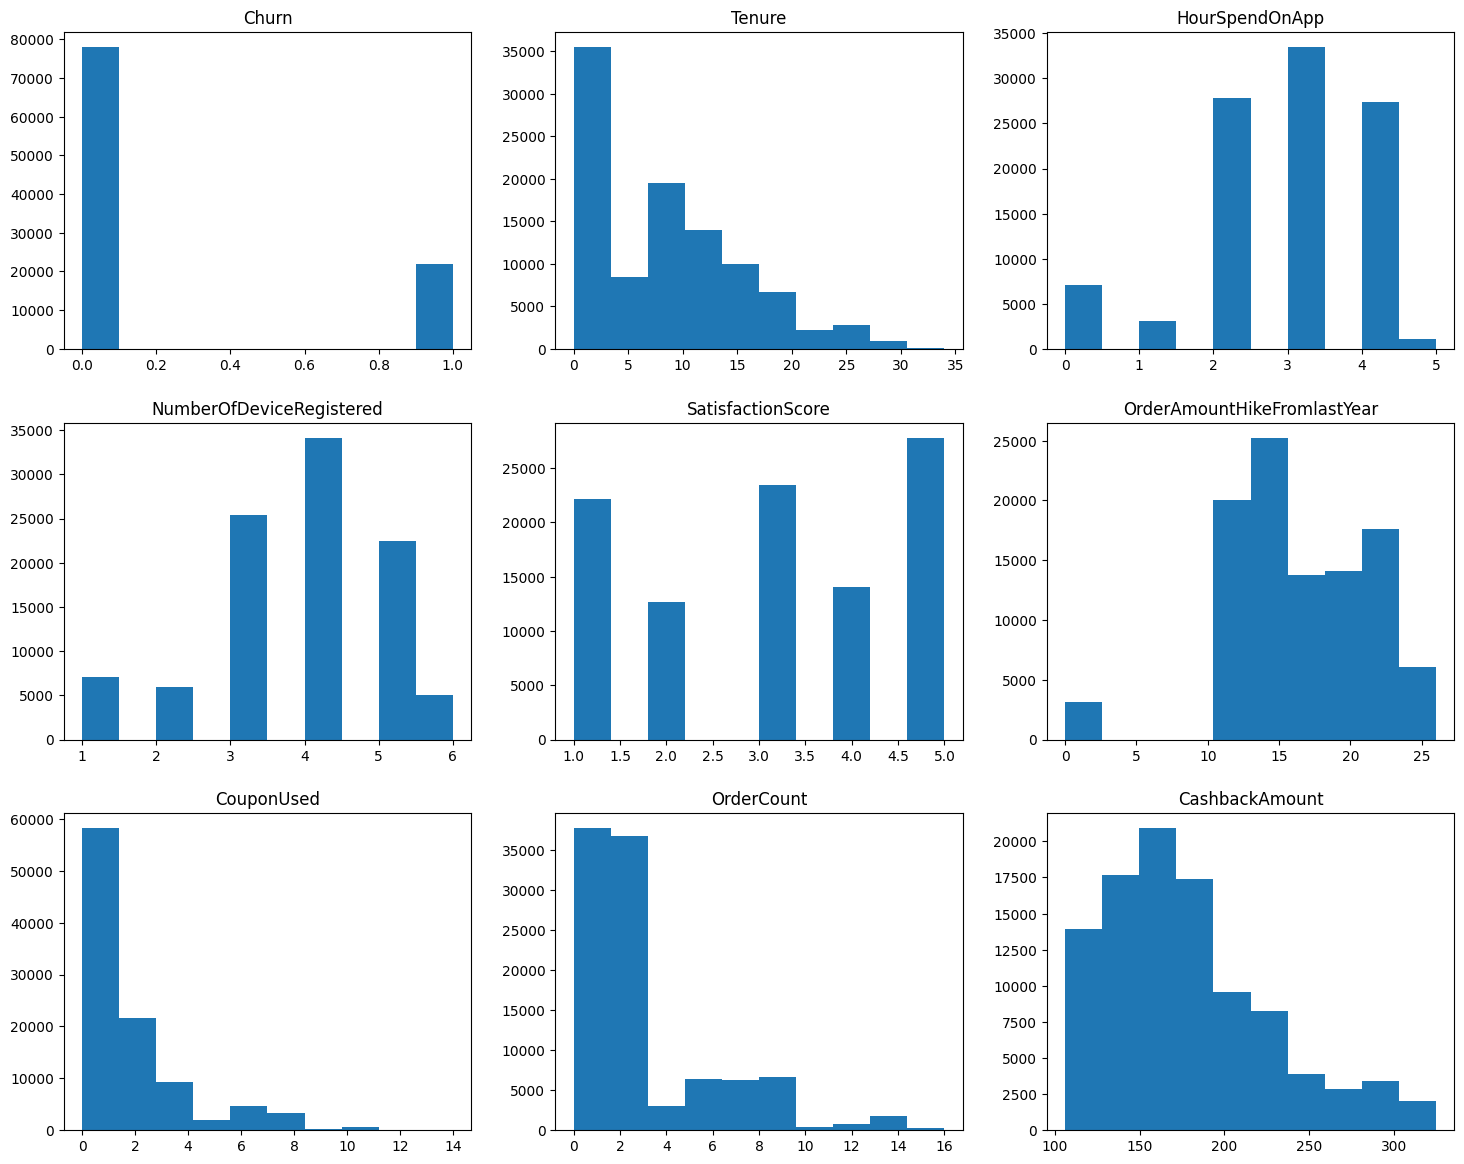

In [12]:
# Plot the distribution of values of synthetic data to ensure that distribution is roughly similar to original dataset

plt.figure(figsize=(15,12))

i = 1
for col in synthetic_data.drop(['CustomerID'], axis = 1, inplace = False).columns:    
    plt.subplot(3,3, i)
    plt.hist(synthetic_data[col])
    plt.title(col)
    i += 1

plt.tight_layout(pad=2.0)
plt.show()        

## Merging & exporting final Customer Dataset

In [13]:
customer_info = pd.read_csv('sampled_customer.csv').drop('Churn', axis = 1)
customer_info.head()

,CustomerID,Age,Gender,Payment Method
0,0,33,Female,Cash
1,1,52,Female,Cash
2,2,47,Female,Cash
3,3,37,Female,Cash
4,4,45,Female,Cash


In [14]:
customers = customer_info.merge(right = synthetic_data, on='CustomerID')

customers.tail()

,CustomerID,Age,Gender,Payment Method,Churn,Tenure,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,CashbackAmount
99995,99995,41,Male,PayPal,0,2.0,2.0,4,3,14.0,0.0,1.0,310.103857
99996,99996,50,Male,PayPal,1,0.0,3.0,5,3,20.0,1.0,2.0,122.640800
99997,99997,18,Male,PayPal,0,6.0,2.0,3,1,20.0,0.0,1.0,293.588623
99998,99998,59,Male,PayPal,0,8.0,0.0,3,3,23.0,0.0,1.0,134.219427
99999,99999,23,Male,PayPal,0,11.0,4.0,4,1,20.0,0.0,2.0,204.970924


In [15]:
customers.to_csv('Customers.csv')